Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline


Load the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving world-happiness-report.csv to world-happiness-report.csv


In [ ]:
df = pd.read_csv("world-happiness-report.csv")

# Question A - Summary of Data

1. How much data is present

In [ ]:
num_rows = df.shape[0]
num_columns = df.shape[1]
print(f"Number of rows (data points): {num_rows}")
print(f"Number of columns (attributes/features): {num_columns}\n")


Number of rows (data points): 1949
Number of columns (attributes/features): 11



2. Data types of each column

In [ ]:
print("Data types of each feature:")
print(df.dtypes, "\n")

Data types of each feature:
Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object 



3. Identify continuous vs categorical features

In [ ]:
continuous_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Continuous-valued features: {continuous_features}")
print(f"Categorical features: {categorical_features}\n")

Continuous-valued features: ['year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
Categorical features: ['Country name']



# Question B

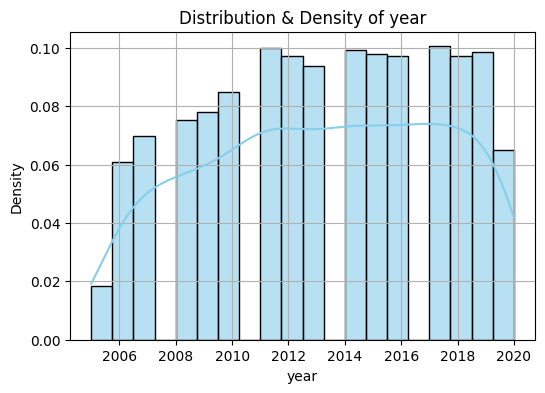


Statistics for year:
count    1949.000000
mean     2013.216008
std         4.166828
min      2005.000000
25%      2010.000000
50%      2013.000000
75%      2017.000000
max      2020.000000
Name: year, dtype: float64


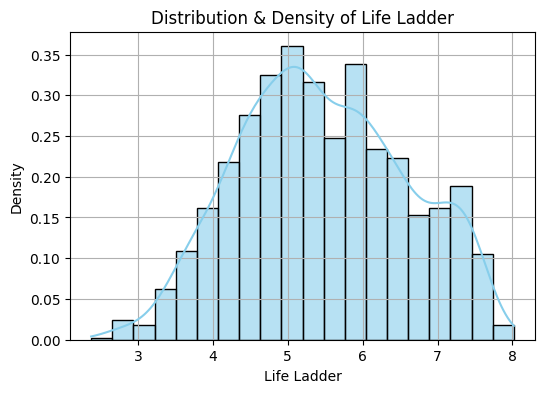


Statistics for Life Ladder:
count    1949.000000
mean        5.466705
std         1.115711
min         2.375000
25%         4.640000
50%         5.386000
75%         6.283000
max         8.019000
Name: Life Ladder, dtype: float64


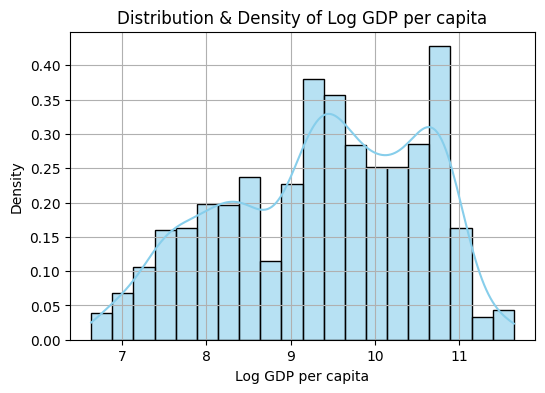


Statistics for Log GDP per capita:
count    1913.000000
mean        9.368453
std         1.154084
min         6.635000
25%         8.464000
50%         9.460000
75%        10.353000
max        11.648000
Name: Log GDP per capita, dtype: float64


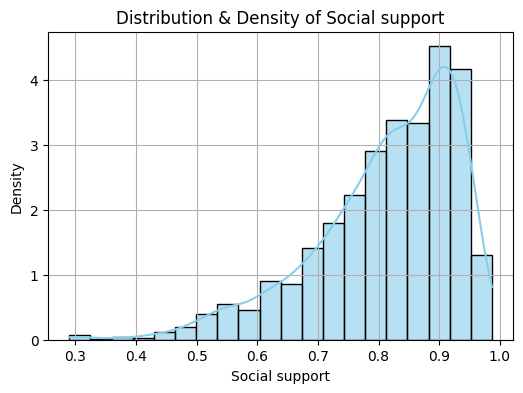


Statistics for Social support:
count    1936.000000
mean        0.812552
std         0.118482
min         0.290000
25%         0.749750
50%         0.835500
75%         0.905000
max         0.987000
Name: Social support, dtype: float64


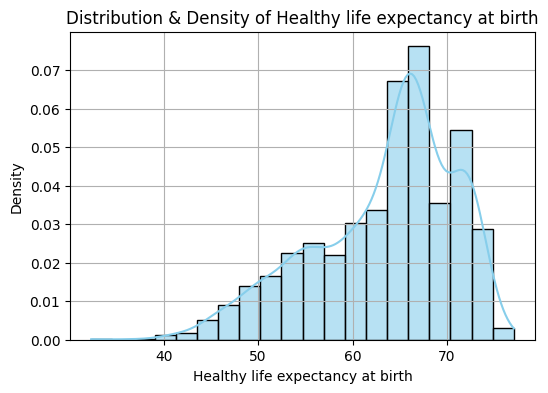


Statistics for Healthy life expectancy at birth:
count    1894.000000
mean       63.359374
std         7.510245
min        32.300000
25%        58.685000
50%        65.200000
75%        68.590000
max        77.100000
Name: Healthy life expectancy at birth, dtype: float64


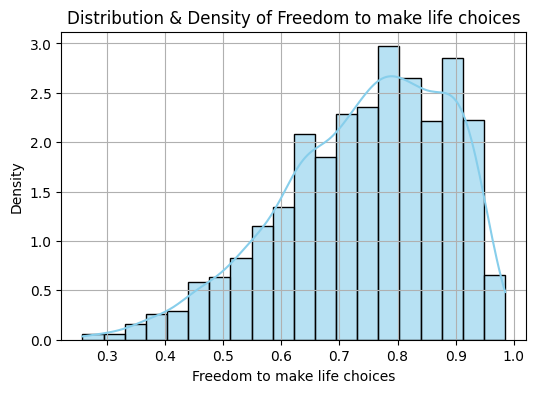


Statistics for Freedom to make life choices:
count    1917.000000
mean        0.742558
std         0.142093
min         0.258000
25%         0.647000
50%         0.763000
75%         0.856000
max         0.985000
Name: Freedom to make life choices, dtype: float64


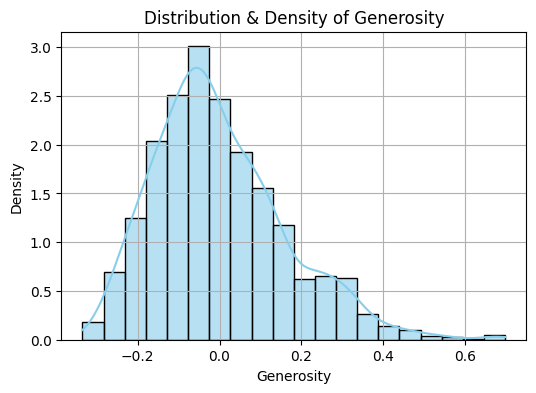


Statistics for Generosity:
count    1860.000000
mean        0.000103
std         0.162215
min        -0.335000
25%        -0.113000
50%        -0.025500
75%         0.091000
max         0.698000
Name: Generosity, dtype: float64


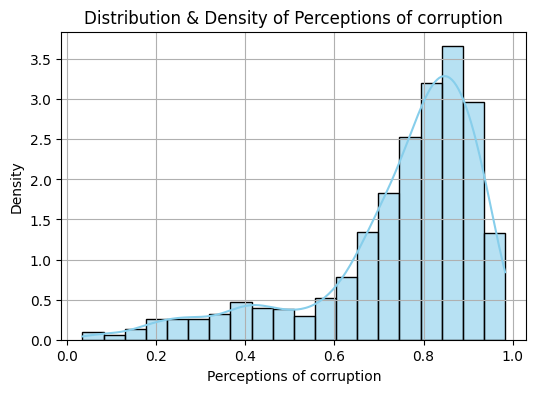


Statistics for Perceptions of corruption:
count    1839.000000
mean        0.747125
std         0.186789
min         0.035000
25%         0.690000
50%         0.802000
75%         0.872000
max         0.983000
Name: Perceptions of corruption, dtype: float64


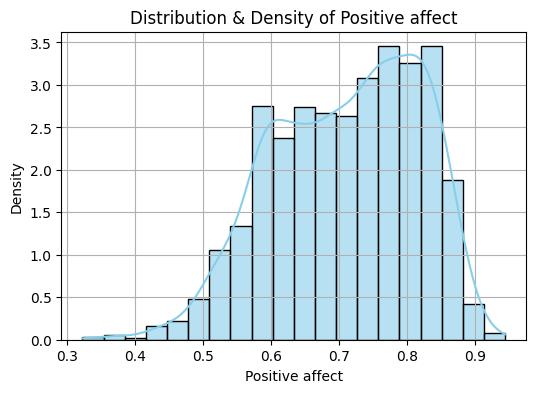


Statistics for Positive affect:
count    1927.000000
mean        0.710003
std         0.107100
min         0.322000
25%         0.625500
50%         0.722000
75%         0.799000
max         0.944000
Name: Positive affect, dtype: float64


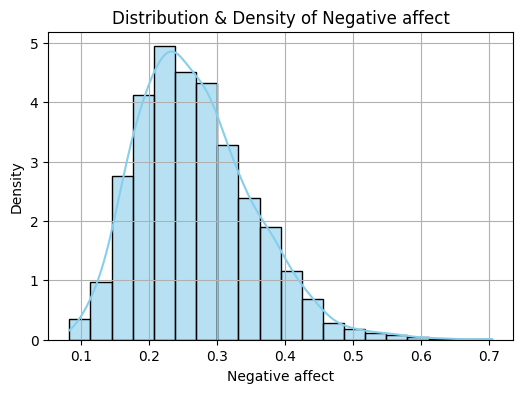


Statistics for Negative affect:
count    1933.000000
mean        0.268544
std         0.085168
min         0.083000
25%         0.206000
50%         0.258000
75%         0.320000
max         0.705000
Name: Negative affect, dtype: float64


In [ ]:
# -----------------------------
# Histogram + Density plots for numeric attributes
# -----------------------------
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), bins=20, kde=True, color='skyblue', stat="density", alpha=0.6)
    plt.title(f'Distribution & Density of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

    # Print basic statistics
    stats = df[col].describe()
    print(f"\nStatistics for {col}:")
    print(stats)


4. Basic statistics for continuous features

In [ ]:
print("Summary statistics for continuous features:")
print(df[continuous_features].describe())

Summary statistics for continuous features:
              year  Life Ladder  Log GDP per capita  Social support  \
count  1949.000000  1949.000000         1913.000000     1936.000000   
mean   2013.216008     5.466705            9.368453        0.812552   
std       4.166828     1.115711            1.154084        0.118482   
min    2005.000000     2.375000            6.635000        0.290000   
25%    2010.000000     4.640000            8.464000        0.749750   
50%    2013.000000     5.386000            9.460000        0.835500   
75%    2017.000000     6.283000           10.353000        0.905000   
max    2020.000000     8.019000           11.648000        0.987000   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       1894.000000                   1917.000000   
mean                          63.359374                      0.742558   
std                            7.510245                      0.142093   
min                     

5. Unique values for categorical features

In [ ]:
for col in categorical_features:
    print(f"\nCategorical feature '{col}' has values: {df[col].unique()}")


Categorical feature 'Country name' has values: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras'
 'Hong Kong S.A.R. of China' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithu

6. Summary statistics for all numeric columns

In [ ]:
numeric_summary = df.describe()
print(numeric_summary)

              year  Life Ladder  Log GDP per capita  Social support  \
count  1949.000000  1949.000000         1913.000000     1936.000000   
mean   2013.216008     5.466705            9.368453        0.812552   
std       4.166828     1.115711            1.154084        0.118482   
min    2005.000000     2.375000            6.635000        0.290000   
25%    2010.000000     4.640000            8.464000        0.749750   
50%    2013.000000     5.386000            9.460000        0.835500   
75%    2017.000000     6.283000           10.353000        0.905000   
max    2020.000000     8.019000           11.648000        0.987000   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       1894.000000                   1917.000000   
mean                          63.359374                      0.742558   
std                            7.510245                      0.142093   
min                           32.300000                      0.25800

Define numeric_cols once (for consistent use later)

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

7. Describe traits for each numeric attribute

In [ ]:
def describe_trait(col):
    data = df[col].dropna()
    mean = data.mean()
    median = data.median()
    std = data.std()
    skew = data.skew()
    min_val = data.min()
    max_val = data.max()
    missing = df[col].isna().sum()
    print(f"\n=== {col} ===")
    print(f"Range: {min_val:.2f} to {max_val:.2f}")
    print(f"Mean: {mean:.2f}, Median: {median:.2f}, Std Dev: {std:.2f}")
    print(f"Missing values: {missing}")
    if skew > 0.5:
        print("→ Positively skewed (most values low, few high outliers).")
    elif skew < -0.5:
        print("→ Negatively skewed (most values high, few low outliers).")
    else:
        print("→ Approximately symmetric distribution.")
    if mean != 0 and std / abs(mean) > 0.5:
        print("→ High variability between countries.")
    else:
        print("→ Moderate or low variability.")

for col in numeric_cols:
    describe_trait(col)


=== year ===
Range: 2005.00 to 2020.00
Mean: 2013.22, Median: 2013.00, Std Dev: 4.17
Missing values: 0
→ Approximately symmetric distribution.
→ Moderate or low variability.

=== Life Ladder ===
Range: 2.38 to 8.02
Mean: 5.47, Median: 5.39, Std Dev: 1.12
Missing values: 0
→ Approximately symmetric distribution.
→ Moderate or low variability.

=== Log GDP per capita ===
Range: 6.63 to 11.65
Mean: 9.37, Median: 9.46, Std Dev: 1.15
Missing values: 36
→ Approximately symmetric distribution.
→ Moderate or low variability.

=== Social support ===
Range: 0.29 to 0.99
Mean: 0.81, Median: 0.84, Std Dev: 0.12
Missing values: 13
→ Negatively skewed (most values high, few low outliers).
→ Moderate or low variability.

=== Healthy life expectancy at birth ===
Range: 32.30 to 77.10
Mean: 63.36, Median: 65.20, Std Dev: 7.51
Missing values: 55
→ Negatively skewed (most values high, few low outliers).
→ Moderate or low variability.

=== Freedom to make life choices ===
Range: 0.26 to 0.98
Mean: 0.74, 

8. Correlation with Life Ladder


In [ ]:
if 'Life Ladder' in df.columns:
    print("\n=== Correlation with Life Ladder (Happiness Score) ===")
    corr = df.corr(numeric_only=True)['Life Ladder'].sort_values(ascending=False)
    print(corr)



=== Correlation with Life Ladder (Happiness Score) ===
Life Ladder                         1.000000
Log GDP per capita                  0.790166
Healthy life expectancy at birth    0.744506
Social support                      0.707806
Positive affect                     0.532273
Freedom to make life choices        0.528063
Generosity                          0.190632
year                                0.035515
Negative affect                    -0.297488
Perceptions of corruption          -0.427245
Name: Life Ladder, dtype: float64


9. Detect attributes requiring special treatment

In [ ]:
print("\n=== Potential Attributes Requiring Special Treatment ===\n")
for col in numeric_cols:
    data = df[col].dropna()
    skew = data.skew()
    missing = df[col].isna().sum()
    min_val, max_val = data.min(), data.max()
    reasons = []
    if missing > 0:
        reasons.append(f"missing values ({missing})")
    if abs(skew) > 1:
        reasons.append(f"high skewness ({skew:.2f})")
    if max_val - min_val > 50:
        reasons.append("wide value range (needs scaling)")
    if (data < 0).any():
        reasons.append("contains negative values")
    if reasons:
        print(f"{col}: " + ", ".join(reasons))

print("\nRecommendation:")
print("→ Handle missing values with imputation.")
print("→ Normalize or standardize attributes with wide ranges.")
print("→ Transform or winsorize highly skewed variables.")



=== Potential Attributes Requiring Special Treatment ===

Log GDP per capita: missing values (36)
Social support: missing values (13), high skewness (-1.11)
Healthy life expectancy at birth: missing values (55)
Freedom to make life choices: missing values (32)
Generosity: missing values (89), contains negative values
Perceptions of corruption: missing values (110), high skewness (-1.50)
Positive affect: missing values (22)
Negative affect: missing values (16)

Recommendation:
→ Handle missing values with imputation.
→ Normalize or standardize attributes with wide ranges.
→ Transform or winsorize highly skewed variables.


# Question C - Correlation Analysis

=== Pearson Correlation Coefficient (PCC) Matrix ===

                                      year  Life Ladder  Log GDP per capita  \
year                              1.000000     0.035515            0.078246   
Life Ladder                       0.035515     1.000000            0.790166   
Log GDP per capita                0.078246     0.790166            1.000000   
Social support                   -0.010093     0.707806            0.692602   
Healthy life expectancy at birth  0.164059     0.744506            0.848049   
Freedom to make life choices      0.222151     0.528063            0.367932   
Generosity                       -0.043422     0.190632           -0.000915   
Perceptions of corruption        -0.081478    -0.427245           -0.345511   
Positive affect                  -0.003245     0.532273            0.302282   
Negative affect                   0.196869    -0.297488           -0.210781   

                                  Social support  \
year                    

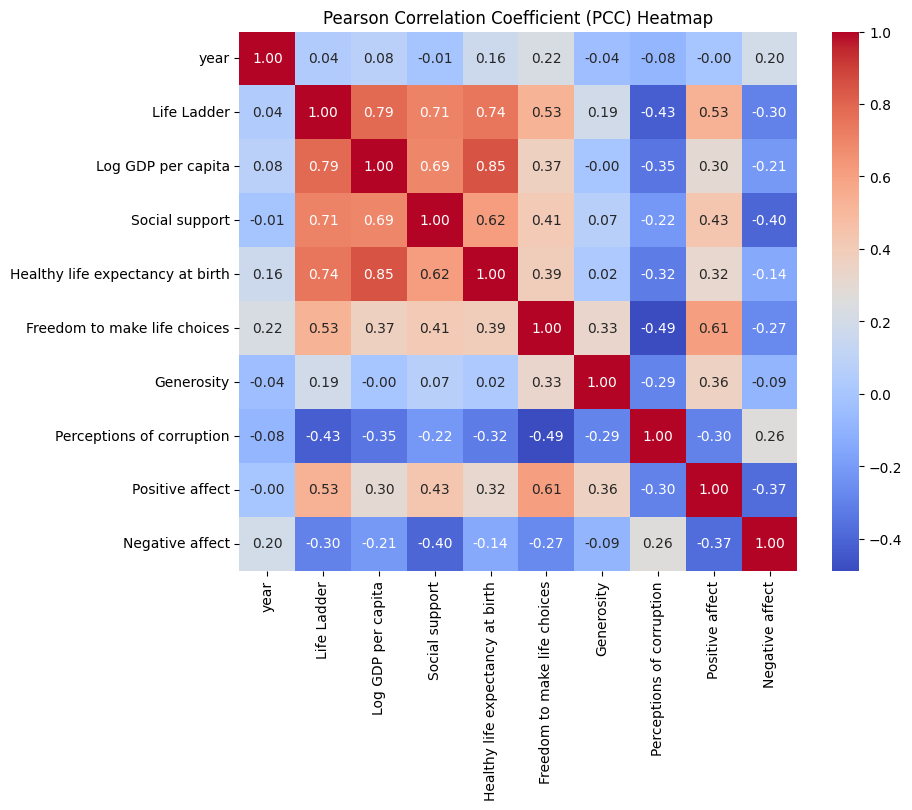


=== Correlation of Each Attribute with Life Ladder (Happiness Score) ===

Life Ladder                         1.000000
Log GDP per capita                  0.790166
Healthy life expectancy at birth    0.744506
Social support                      0.707806
Positive affect                     0.532273
Freedom to make life choices        0.528063
Generosity                          0.190632
year                                0.035515
Negative affect                    -0.297488
Perceptions of corruption          -0.427245
Name: Life Ladder, dtype: float64


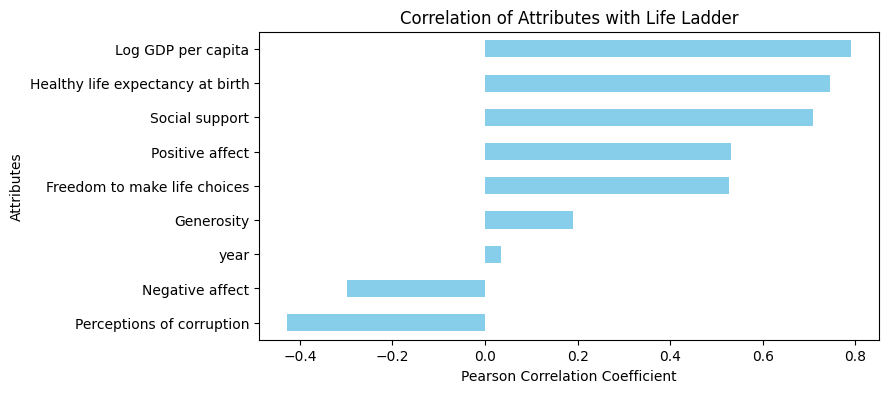

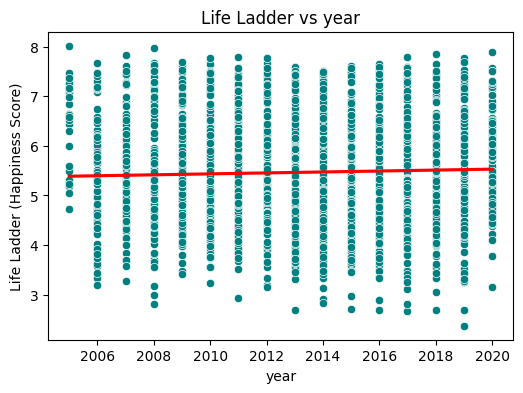

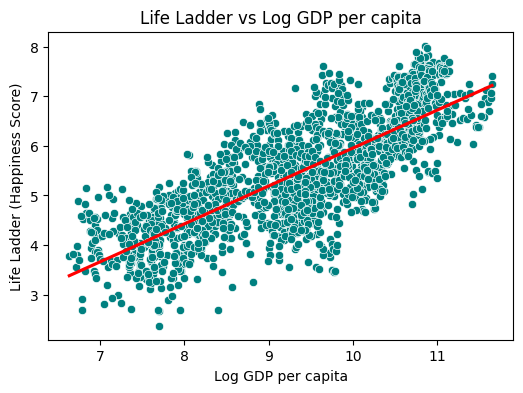

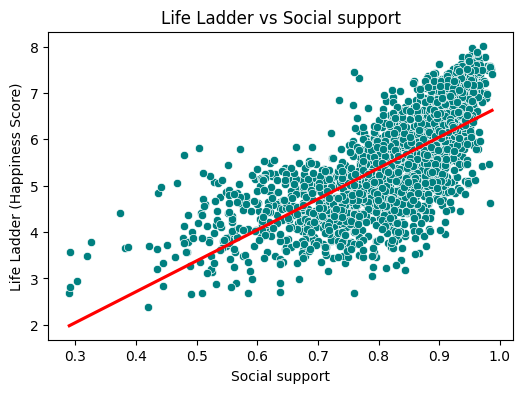

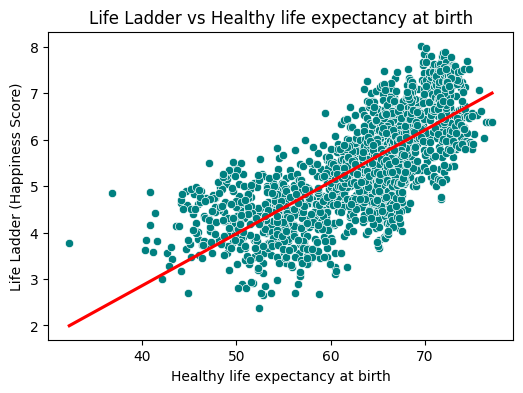

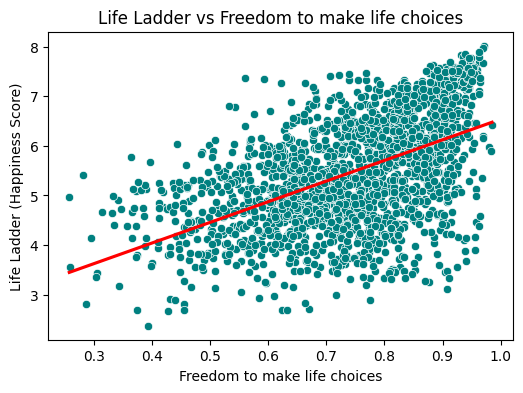

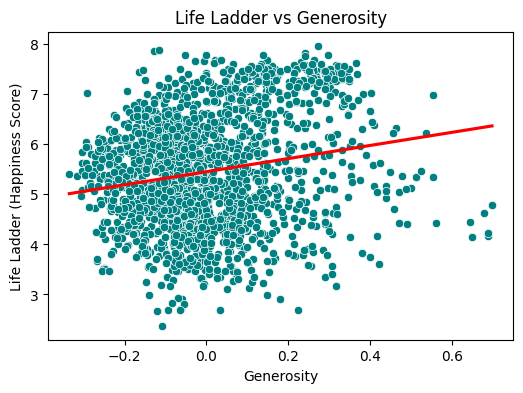

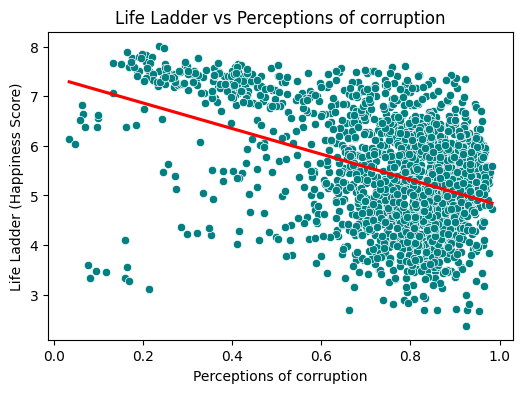

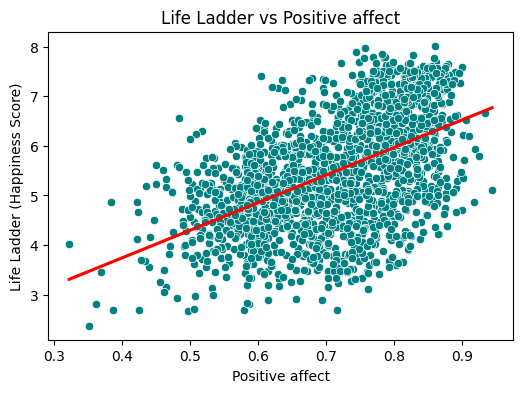

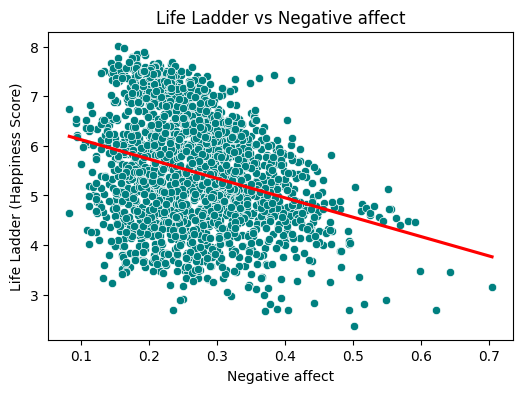

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_cols]

print("=== Pearson Correlation Coefficient (PCC) Matrix ===\n")
pcc_matrix = numeric_df.corr(method='pearson')
print(pcc_matrix)

plt.figure(figsize=(9, 7))
sns.heatmap(pcc_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Coefficient (PCC) Heatmap")
plt.show()

if 'Life Ladder' in numeric_df.columns:
    print("\n=== Correlation of Each Attribute with Life Ladder (Happiness Score) ===\n")
    corr_target = pcc_matrix['Life Ladder'].sort_values(ascending=False)
    print(corr_target)
    plt.figure(figsize=(8, 4))
    corr_target.drop('Life Ladder').plot(kind='barh', color='skyblue')
    plt.title("Correlation of Attributes with Life Ladder")
    plt.xlabel("Pearson Correlation Coefficient")
    plt.ylabel("Attributes")
    plt.gca().invert_yaxis()
    plt.show()

if 'Life Ladder' in df.columns:
    for col in numeric_cols:
        if col != 'Life Ladder':
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=df[col], y=df['Life Ladder'], color='teal')
            sns.regplot(x=df[col], y=df['Life Ladder'], scatter=False, color='red', ci=None)
            plt.title(f"Life Ladder vs {col}")
            plt.xlabel(col)
            plt.ylabel("Life Ladder (Happiness Score)")
            plt.show()



# Question D - Model Comparison: Closed-Form vs SGD

In [ ]:
target_col = 'Life Ladder'
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if target_col not in numeric_cols:
    raise ValueError(f"Target column '{target_col}' not found among numeric columns.")
feature_cols = [c for c in numeric_cols if c != target_col]
X_all = df[feature_cols].copy()
y_all = df[target_col].copy()

imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
kf = KFold(n_splits=4, shuffle=True, random_state=42)

rmse_closed, rmse_sgd, r2_closed, r2_sgd = [], [], [], []
fold_idx = 0
plt.figure(figsize=(12, 8))

for train_idx, test_idx in kf.split(X_all):
    fold_idx += 1
    X_train_raw, X_test_raw = X_all.iloc[train_idx], X_all.iloc[test_idx]
    y_train, y_test = y_all.iloc[train_idx], y_all.iloc[test_idx]

    X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_raw), columns=feature_cols)
    X_test_imputed = pd.DataFrame(imputer.transform(X_test_raw), columns=feature_cols)
    X_train = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=feature_cols)
    X_test = pd.DataFrame(scaler.transform(X_test_imputed), columns=feature_cols)

    X_train_aug = np.hstack([np.ones((X_train.shape[0], 1)), X_train.values])
    X_test_aug = np.hstack([np.ones((X_test.shape[0], 1)), X_test.values])
    theta = np.linalg.pinv(X_train_aug.T @ X_train_aug) @ (X_train_aug.T @ y_train.values)
    y_pred_closed = X_test_aug @ theta
    rmse_c = np.sqrt(mean_squared_error(y_test, y_pred_closed))
    rmse_closed.append(rmse_c)
    ss_res = np.sum((y_test - y_pred_closed) ** 2)
    ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
    r2_c = 1 - ss_res / ss_tot
    r2_closed.append(r2_c)

    sgd = SGDRegressor(loss='squared_error', penalty=None, max_iter=2000, tol=1e-4, random_state=42)
    sgd.fit(X_train.values, y_train.values)
    y_pred_sgd = sgd.predict(X_test.values)
    rmse_s = np.sqrt(mean_squared_error(y_test, y_pred_sgd))
    rmse_sgd.append(rmse_s)
    ss_res_s = np.sum((y_test - y_pred_sgd) ** 2)
    r2_s = 1 - ss_res_s / ss_tot
    r2_sgd.append(r2_s)

    print(f"Fold {fold_idx}: Closed-form RMSE={rmse_c:.4f}, R^2={r2_c:.4f} | SGD RMSE={rmse_s:.4f}, R^2={r2_s:.4f}")

# Summary function
def summarize(name, rmse_list, r2_list):
    print(f"\n{name} summary (4-fold CV):")
    print(f"RMSE per fold: {[round(x,4) for x in rmse_list]}")
    print(f"Mean RMSE: {np.mean(rmse_list):.4f}, Std RMSE: {np.std(rmse_list):.4f}")
    print(f"Mean R^2: {np.mean(r2_list):.4f}, Std R^2: {np.std(r2_list):.4f}")

summarize("Closed-form (Normal Eq.)", rmse_closed, r2_closed)
summarize("SGD", rmse_sgd, r2_sgd)


Fold 1: Closed-form RMSE=0.5424, R^2=0.7615 | SGD RMSE=0.5432, R^2=0.7608
Fold 2: Closed-form RMSE=0.5399, R^2=0.7708 | SGD RMSE=0.5401, R^2=0.7707
Fold 3: Closed-form RMSE=0.5660, R^2=0.7492 | SGD RMSE=0.5655, R^2=0.7496
Fold 4: Closed-form RMSE=0.5372, R^2=0.7566 | SGD RMSE=0.5371, R^2=0.7568

Closed-form (Normal Eq.) summary (4-fold CV):
RMSE per fold: [np.float64(0.5424), np.float64(0.5399), np.float64(0.566), np.float64(0.5372)]
Mean RMSE: 0.5464, Std RMSE: 0.0115
Mean R^2: 0.7595, Std R^2: 0.0079

SGD summary (4-fold CV):
RMSE per fold: [np.float64(0.5432), np.float64(0.5401), np.float64(0.5655), np.float64(0.5371)]
Mean RMSE: 0.5465, Std RMSE: 0.0112
Mean R^2: 0.7595, Std R^2: 0.0076


<Figure size 1200x800 with 0 Axes>

# Question E - Polynomial regression with SGD

In [ ]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
target_col = 'Life Ladder'
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if target_col not in numeric_cols:
    raise ValueError(f"Target column '{target_col}' not found among numeric columns.")
feature_cols = [c for c in numeric_cols if c != target_col]

X_raw = df[feature_cols].copy()
y_raw = df[target_col].copy()

# Imputer + scaler (fit on whole dataset — we'll use these inside CV folds)
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

Hyperparameter grid to explore (degree for polynomial + alpha for SGD regularization)
Keep grid modest so it's fast — expand as needed

In [ ]:
degrees = [1, 2, 3]                  # polynomial degrees to try
alphas = [1e-4, 1e-3, 1e-2]          # regularization strength (alpha in SGDRegressor)
penalty = 'elasticnet'               # we will use elasticnet here; explore l1_ratio values
l1_ratios = [0.0, 0.5, 1.0]          # 0->ridge-like, 1->lasso-like, 0.5->mix

CV settings

In [ ]:
kf = KFold(n_splits=4, shuffle=True, random_state=RANDOM_SEED)


Store CV results

In [ ]:
grid_results = []

print("Starting polynomial + SGD CV grid search (degrees x alphas x l1_ratios)...")
for deg in degrees:
    # create polynomial transformer (we will fit per-train-fold so not here)
    for alpha in alphas:
        for l1_ratio in l1_ratios:

            fold_rmse = []
            fold_r2 = []
            for train_idx, val_idx in kf.split(X_raw):
                # Split
                X_tr_raw = X_raw.iloc[train_idx].copy()
                y_tr = y_raw.iloc[train_idx].copy()
                X_val_raw = X_raw.iloc[val_idx].copy()
                y_val = y_raw.iloc[val_idx].copy()

                # Impute -> Scale (fit on train only)
                X_tr_imp = pd.DataFrame(imputer.fit_transform(X_tr_raw), columns=feature_cols, index=X_tr_raw.index)
                X_val_imp = pd.DataFrame(imputer.transform(X_val_raw), columns=feature_cols, index=X_val_raw.index)

                # Polynomial features (fit on training)
                poly = PolynomialFeatures(degree=deg, include_bias=False)
                X_tr_poly = poly.fit_transform(X_tr_imp)
                X_val_poly = poly.transform(X_val_imp)

                # Scale (fit on train poly)
                X_tr = scaler.fit_transform(X_tr_poly)
                X_val = scaler.transform(X_val_poly)

                # Train SGDRegressor (we don't need epoch-level curves here; just final CV eval)
                sgd = SGDRegressor(
                    loss='squared_error',
                    penalty=penalty,
                    alpha=alpha,
                    l1_ratio=l1_ratio,
                    max_iter=2000,
                    tol=1e-4,
                    random_state=RANDOM_SEED
                )
                sgd.fit(X_tr, y_tr)
                y_val_pred = sgd.predict(X_val)
                rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
                fold_rmse.append(rmse_val)

            mean_rmse = np.mean(fold_rmse)
            std_rmse = np.std(fold_rmse)
            grid_results.append({
                'degree': deg,
                'alpha': alpha,
                'l1_ratio': l1_ratio,
                'mean_cv_rmse': mean_rmse,
                'std_cv_rmse': std_rmse
            })
            print(f"deg={deg}, alpha={alpha:.4g}, l1={l1_ratio} -> mean RMSE={mean_rmse:.4f} (std {std_rmse:.4f})")

# Convert to DataFrame and sort by best (lowest RMSE)
grid_df = pd.DataFrame(grid_results).sort_values('mean_cv_rmse').reset_index(drop=True)
print("\nTop 10 grid results:")
print(grid_df.head(10))


Starting polynomial + SGD CV grid search (degrees x alphas x l1_ratios)...
deg=1, alpha=0.0001, l1=0.0 -> mean RMSE=0.5465 (std 0.0112)
deg=1, alpha=0.0001, l1=0.5 -> mean RMSE=0.5465 (std 0.0112)
deg=1, alpha=0.0001, l1=1.0 -> mean RMSE=0.5465 (std 0.0112)
deg=1, alpha=0.001, l1=0.0 -> mean RMSE=0.5465 (std 0.0112)
deg=1, alpha=0.001, l1=0.5 -> mean RMSE=0.5465 (std 0.0112)
deg=1, alpha=0.001, l1=1.0 -> mean RMSE=0.5465 (std 0.0112)
deg=1, alpha=0.01, l1=0.0 -> mean RMSE=0.5465 (std 0.0111)
deg=1, alpha=0.01, l1=0.5 -> mean RMSE=0.5466 (std 0.0111)
deg=1, alpha=0.01, l1=1.0 -> mean RMSE=0.5470 (std 0.0110)
deg=2, alpha=0.0001, l1=0.0 -> mean RMSE=0.5163 (std 0.0109)
deg=2, alpha=0.0001, l1=0.5 -> mean RMSE=0.5164 (std 0.0110)
deg=2, alpha=0.0001, l1=1.0 -> mean RMSE=0.5165 (std 0.0109)
deg=2, alpha=0.001, l1=0.0 -> mean RMSE=0.5165 (std 0.0109)
deg=2, alpha=0.001, l1=0.5 -> mean RMSE=0.5175 (std 0.0111)
deg=2, alpha=0.001, l1=1.0 -> mean RMSE=0.5202 (std 0.0102)
deg=2, alpha=0.01, l1=

  Analyze overfitting/underfitting vs degree using the best alpha/l1_ratio found above

 - We'll pick the best hyperparameters (lowest mean_cv_rmse) and then:
 - plot training vs validation RMSE by epoch for that configuration
 - also produce degree vs CV RMSE plot to diagnose under/overfitting

In [ ]:
best = grid_df.iloc[0]
best_degree = int(best['degree'])
best_alpha = float(best['alpha'])
best_l1 = float(best['l1_ratio'])
print(f"\nSelected best config: degree={best_degree}, alpha={best_alpha}, l1_ratio={best_l1}")




Selected best config: degree=2, alpha=0.0001, l1_ratio=0.0


Degree vs CV RMSE plot

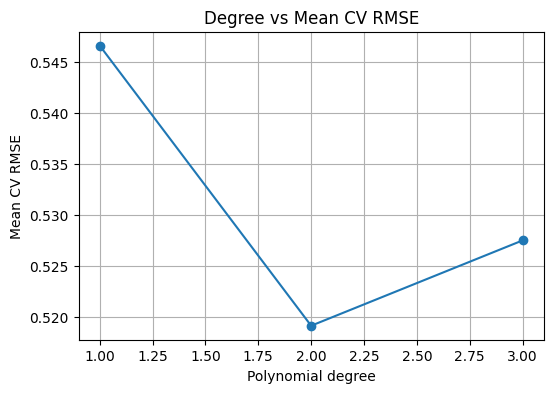

In [ ]:
plt.figure(figsize=(6,4))
avg_rmse_by_degree = grid_df.groupby('degree')['mean_cv_rmse'].mean().reindex(degrees)
plt.plot(avg_rmse_by_degree.index, avg_rmse_by_degree.values, marker='o')
plt.title('Degree vs Mean CV RMSE')
plt.xlabel('Polynomial degree')
plt.ylabel('Mean CV RMSE')
plt.grid(True)
plt.show()

Epoch-level training/validation loss curve for the selected model

We'll use a single train/val split (e.g., 80/20) for plotting epoch curves.

Approach: set max_iter=1 and warm_start=True, call fit in a loop; after each epoch compute RMSE on train & val.

In [ ]:
X_train_full, X_val_full, y_train_full, y_val_full = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=RANDOM_SEED
)

Preprocess: impute -> polynomial -> scale using training set (note we will re-create for each epoch consistently)

In [ ]:
X_tr_imp = pd.DataFrame(imputer.fit_transform(X_train_full), columns=feature_cols, index=X_train_full.index)
X_val_imp = pd.DataFrame(imputer.transform(X_val_full), columns=feature_cols, index=X_val_full.index)
poly = PolynomialFeatures(degree=best_degree, include_bias=False)
X_tr_poly = poly.fit_transform(X_tr_imp)
X_val_poly = poly.transform(X_val_imp)

scaler_poly = StandardScaler()
X_tr = scaler_poly.fit_transform(X_tr_poly)
X_val = scaler_poly.transform(X_val_poly)


 Configure SGD for epoch-wise training tracking

In [ ]:
n_epochs = 200           # number of epochs to track (adjust as needed)
sgd_epoch = SGDRegressor(
    loss='squared_error',
    penalty=penalty,
    alpha=best_alpha,
    l1_ratio=best_l1,
    max_iter=1,          # one epoch per fit() call
    tol=None,            # disable tol-based early stop; we'll manage epochs manually
    warm_start=True,
    learning_rate='invscaling',
    eta0=0.01,           # initial learning rate (you can adjust)
    random_state=RANDOM_SEED
)

train_rmse_epochs = []
val_rmse_epochs = []


Initialize by calling fit once to set coef_ shape (warm_start requires it)

In [ ]:
sgd_epoch.fit(X_tr, y_train_full)

for epoch in range(1, n_epochs + 1):
    # Do one epoch (fit will continue from previous coef because warm_start=True and max_iter=1)
    sgd_epoch.fit(X_tr, y_train_full)

    # Predictions and RMSE
    y_tr_pred = sgd_epoch.predict(X_tr)
    y_val_pred = sgd_epoch.predict(X_val)

    rmse_tr = np.sqrt(mean_squared_error(y_train_full, y_tr_pred))
    rmse_val = np.sqrt(mean_squared_error(y_val_full, y_val_pred))

    train_rmse_epochs.append(rmse_tr)
    val_rmse_epochs.append(rmse_val)

    # Optional: print progress occasionally
    if epoch % 25 == 0 or epoch == 1 or epoch == n_epochs:
        print(f"Epoch {epoch:03d} — Train RMSE: {rmse_tr:.4f} | Val RMSE: {rmse_val:.4f}")


Epoch 001 — Train RMSE: 0.5301 | Val RMSE: 0.5353
Epoch 025 — Train RMSE: 0.5122 | Val RMSE: 0.5198
Epoch 050 — Train RMSE: 0.5088 | Val RMSE: 0.5175
Epoch 075 — Train RMSE: 0.5072 | Val RMSE: 0.5167
Epoch 100 — Train RMSE: 0.5062 | Val RMSE: 0.5162
Epoch 125 — Train RMSE: 0.5054 | Val RMSE: 0.5158
Epoch 150 — Train RMSE: 0.5049 | Val RMSE: 0.5155
Epoch 175 — Train RMSE: 0.5044 | Val RMSE: 0.5152
Epoch 200 — Train RMSE: 0.5041 | Val RMSE: 0.5150


Plot epoch curves

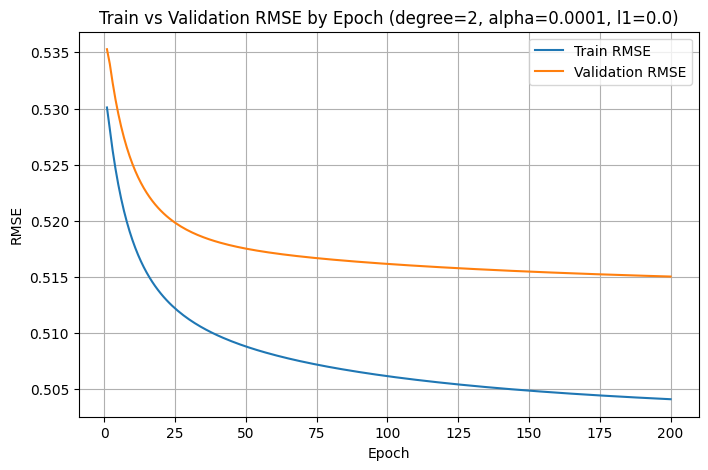

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1, n_epochs+1), train_rmse_epochs, label='Train RMSE')
plt.plot(range(1, n_epochs+1), val_rmse_epochs, label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title(f'Train vs Validation RMSE by Epoch (degree={best_degree}, alpha={best_alpha}, l1={best_l1})')
plt.legend()
plt.grid(True)
plt.show()

Final analysis: Check if model overfits/underfits
Criteria (informal):
- If train RMSE >> val RMSE -> underfitting (both high)
- If train RMSE << val RMSE and val RMSE is relatively high -> overfitting
- If both low and close -> good fit
We'll print final epoch values and give a short summary variable you can inspect programmatically.

In [ ]:
final_train_rmse = train_rmse_epochs[-1]
final_val_rmse = val_rmse_epochs[-1]
summary = {
    'final_train_rmse': final_train_rmse,
    'final_val_rmse': final_val_rmse,
    'rmse_gap': final_val_rmse - final_train_rmse,
    'degree': best_degree,
    'alpha': best_alpha,
    'l1_ratio': best_l1
}
print("\nFinal epoch RMSEs:")
print(summary)


Final epoch RMSEs:
{'final_train_rmse': np.float64(0.5040973775963755), 'final_val_rmse': np.float64(0.5150273912301607), 'rmse_gap': np.float64(0.010930013633785207), 'degree': 2, 'alpha': 0.0001, 'l1_ratio': 0.0}


Heuristic statement (you can adjust thresholds)

In [ ]:
if final_train_rmse > 1.25 * final_val_rmse and final_train_rmse > 0.5:
    print("Heuristic: Model might be underfitting (train RMSE notably > val RMSE).")
elif final_train_rmse + 0.1 < final_val_rmse:
    print("Heuristic: Model shows signs of overfitting (validation RMSE higher than training RMSE).")
else:
    print("Heuristic: Model appears to fit reasonably (train and val RMSE are similar).")



Heuristic: Model appears to fit reasonably (train and val RMSE are similar).


# Question F - Test Evaluation


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving world-happiness-report-2021.csv to world-happiness-report-2021.csv


In [ ]:
df_test = pd.read_csv("world-happiness-report-2021.csv")

In [ ]:
# Map test columns to match training column names
df_test.rename(columns={
    'Logged GDP per capita': 'Log GDP per capita',
    'Healthy life expectancy': 'Healthy life expectancy at birth'
}, inplace=True)

# Keep only columns that exist in both training and test
common_cols = [c for c in X_all.columns if c in df_test.columns]
X_test = df_test[common_cols]


In [ ]:
for col in ['Positive affect', 'Negative affect']:
    if col not in X_test.columns:
        X_test[col] = X_all[col].mean()


/tmp/ipython-input-4183964866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_all[col].mean()
/tmp/ipython-input-4183964866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_all[col].mean()


In [ ]:
for col in X_all.columns:
    if col not in X_test.columns:
        X_test[col] = X_all[col].mean()  # fill with training mean

# Ensure same column order as training
X_test = X_test[X_all.columns]

# Now impute and scale
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test.columns)


/tmp/ipython-input-1003823972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_all[col].mean()  # fill with training mean


In [ ]:
y_test_pred = best_sgd.predict(X_test_scaled)

# Compute RMSE if Life Ladder is present
y_test_true = df_test['Life Ladder']
test_rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
print(f"Test RMSE: {test_rmse:.4f}")


Test RMSE: 0.5556


Impute and scale training data

In [ ]:
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

X_all_imputed = pd.DataFrame(imputer.fit_transform(X_all), columns=X_all.columns)
X_all_scaled = pd.DataFrame(scaler.fit_transform(X_all_imputed), columns=X_all.columns)

Impute and scale test data

In [ ]:
X_test = df_test[common_cols].copy()
missing_cols = ['year', 'Log GDP per capita', 'Healthy life expectancy at birth', 'Positive affect', 'Negative affect']

for col in missing_cols:
    if col not in X_test.columns:
        X_test[col] = X_train[col].mean()  # or df[col].mean() if X_train not defined yet



Reorder columns to match fit time order

In [ ]:
X_test = X_test[X_train.columns]

Now safe to impute

In [ ]:
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test.columns)

Train final model using the processed training data

In [ ]:
best_sgd = SGDRegressor(
    loss='squared_error',
    penalty='elasticnet',
    alpha=0.01,
    l1_ratio=0.5,
    eta0=0.0001,
    learning_rate='constant',
    max_iter=2000,
    tol=1e-4,
    random_state=42
)

best_sgd.fit(X_all_scaled, y_all)


SGDRegressor(alpha=0.01, eta0=0.0001, l1_ratio=0.5, learning_rate='constant',
             max_iter=2000, penalty='elasticnet', random_state=42, tol=0.0001)

Predict on test data

In [ ]:
y_test_pred = best_sgd.predict(X_test_scaled)

Evaluate if true target values are available

In [ ]:
if 'Life Ladder' in df_test.columns:
    y_test_true = df_test['Life Ladder']
    test_rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
    print(f"Test RMSE: {test_rmse:.4f}")
else:
    print("Test labels not available; predictions generated only.")

df_test['Predicted_Life_Ladder'] = y_test_pred

Test labels not available; predictions generated only.


In [ ]:
df_test.rename(columns={'Ladder Score': 'Life Ladder'}, inplace=True)


In [ ]:
df_test.rename(columns={'Ladder score': 'Life Ladder'}, inplace=True)

In [ ]:
y_test_pred = best_sgd.predict(X_test_scaled)

# Compute RMSE if Life Ladder is present
y_test_true = df_test['Life Ladder']
test_rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
print(f"Test RMSE: {test_rmse:.4f}")


Test RMSE: 0.5556
